# NBA Playoff Predictor - Basic EDA

This notebook explores the processed dataset used for modeling.

In [1]:
import sys
import os

# Add the project root to the path so we can import src
sys.path.append(os.path.abspath(os.path.join('..', '..')))

from src.data import make_dataset, load_team_stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

## Load Data

In [2]:
df = make_dataset()
team_stats = load_team_stats()
print(f"Dataset Shape: {df.shape}")
df

Dataset Shape: (345, 18)


,season,team_a,team_b,net_rating_diff,off_rating_diff,w_pct_diff,ts_pct_diff,efg_pct_diff,oreb_pct_diff,fta_rate_diff,opp_tov_pct_diff,def_rating_diff,tm_tov_pct_diff,opp_efg_pct_diff,opp_oreb_pct_diff,opp_fta_rate_diff,home_court,team_a_won
0,1996-97,LAL,UTA,-5.6,-6.0,-0.097,-0.046,-0.035,0.015,-0.038,-0.002,0.3,0.008,0.002,-0.029,0.066,0,0
1,1996-97,HOU,SEA,-3.8,-2.1,0.000,0.003,0.010,-0.023,-0.051,-0.050,-1.8,-0.015,0.009,0.035,0.065,1,1
2,1996-97,ATL,CHI,-5.6,-6.0,-0.158,-0.005,-0.013,-0.040,0.043,0.001,0.4,-0.021,-0.001,0.000,0.006,0,0
3,1996-97,MIA,NYK,2.6,2.3,0.049,0.000,0.006,0.001,-0.016,0.004,0.3,0.015,-0.002,-0.022,0.042,1,1
4,1996-97,HOU,UTA,-5.1,-4.9,-0.085,-0.021,-0.011,-0.010,-0.082,-0.024,-0.2,-0.011,-0.001,0.005,0.126,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2022-23,BOS,PHI,2.3,0.3,0.036,-0.008,0.003,-0.003,-0.057,-0.019,2.1,0.006,0.013,0.025,0.043,1,1
341,2022-23,GSW,LAL,1.0,1.2,0.013,0.018,0.029,0.008,-0.075,0.015,-0.2,-0.021,-0.005,-0.008,-0.056,1,0
342,2022-23,DEN,LAL,2.6,2.9,0.122,0.019,0.031,0.020,-0.040,0.013,-0.3,-0.010,-0.008,0.000,-0.038,1,1
343,2022-23,BOS,MIA,7.2,5.0,0.158,0.026,0.036,-0.019,-0.027,-0.035,2.2,0.005,0.033,0.013,0.019,1,0


## Clean Data Checks

- **Missing Values**: Check for nulls in critical columns.
- **Duplicates**: Ensure no repeated matchup rows.
- **Data Types**: Verify numerical columns are floats/ints.
- **Summary Stats**: Quick look at mean/min/max to catch impossible values.
- **Integrity**: Validate season counts (approx 15 series/year) and team names.

In [3]:
print("=== Missing Values by Column ===")
print(df.isna().sum())
print("\n")

print("=== Number of Duplicate Rows ===")
print(df.duplicated().sum())
print("\n")

print("=== Data Types ===")
print(df.dtypes)
print("\n")

print("=== Summary Statistics (Transposed) ===")
print(df.describe().T)
print("\n")

print("=== Season Integrity Check ===")
season_counts = df['season'].value_counts().sort_index()
print("Series count per season:")
print(season_counts)
print("\nExpected rough range: about 15 series per season\n")
print("\n")


print("=== Team Name Integrity Check ===")

# Check nulls
print("Null values in team_a:", df['team_a'].isna().sum())
print("Null values in team_b:", df['team_b'].isna().sum())

# Check types
print("\nData types for team columns:")
print(df[['team_a', 'team_b']].dtypes)


=== Missing Values by Column ===
season               0
team_a               0
team_b               0
net_rating_diff      0
off_rating_diff      0
w_pct_diff           0
ts_pct_diff          0
efg_pct_diff         0
oreb_pct_diff        0
fta_rate_diff        0
opp_tov_pct_diff     0
def_rating_diff      0
tm_tov_pct_diff      0
opp_efg_pct_diff     0
opp_oreb_pct_diff    0
opp_fta_rate_diff    0
home_court           0
team_a_won           0
dtype: int64


=== Number of Duplicate Rows ===
0


=== Data Types ===
season                object
team_a                object
team_b                object
net_rating_diff      float64
off_rating_diff      float64
w_pct_diff           float64
ts_pct_diff          float64
efg_pct_diff         float64
oreb_pct_diff        float64
fta_rate_diff        float64
opp_tov_pct_diff     float64
def_rating_diff      float64
tm_tov_pct_diff      float64
opp_efg_pct_diff     float64
opp_oreb_pct_diff    float64
opp_fta_rate_diff    float64
home_court        

In [4]:
# Sort by season and win %, then take the top one
if 'team_stats' not in locals():
    team_stats = load_team_stats()

top_per_team = (
    team_stats
    .sort_values(["SEASON", "W_PCT"], ascending=[True, False])
    .groupby("SEASON")
    .first()
    .reset_index())

cols_to_show = ['SEASON', 'TEAM_NAME', 'W', 'L', 'W_PCT', 'NET_RATING']
print(top_per_team[cols_to_show].to_string(index=False))

 SEASON             TEAM_NAME  W  L  W_PCT  NET_RATING
1996-97         Chicago Bulls 69 13  0.841        11.8
1997-98         Chicago Bulls 62 20  0.756         7.8
1998-99     San Antonio Spurs 37 13  0.740         9.1
1999-00    Los Angeles Lakers 67 15  0.817         9.0
2000-01     San Antonio Spurs 58 24  0.707         8.3
2001-02      Sacramento Kings 61 21  0.744         8.1
2002-03      Dallas Mavericks 60 22  0.732         8.3
2003-04        Indiana Pacers 61 21  0.744         6.3
2004-05          Phoenix Suns 62 20  0.756         7.0
2005-06       Detroit Pistons 64 18  0.780         7.6
2006-07      Dallas Mavericks 67 15  0.817         7.6
2007-08        Boston Celtics 66 16  0.805        10.8
2008-09   Cleveland Cavaliers 66 16  0.805         9.6
2009-10   Cleveland Cavaliers 61 21  0.744         6.8
2010-11         Chicago Bulls 62 20  0.756         7.8
2011-12         Chicago Bulls 50 16  0.758         8.8
2012-13            Miami Heat 66 16  0.805         8.2
2013-14   

## Basic Distribution Checks

These checks help understand spread, skew, and potential outliers.
- Mean, median, standard deviation for each diff metric
- Min and max values
- Correlation matrix
- Histograms of each feature (to detect heavy tails or weird spikes)
- Check imbalance of the target variable (`team_a_won`)

=== Basic Statistics ===


,mean,50%,std,min,max
net_rating_diff,-0.185797,-0.200,4.314544,-13.500,12.000
off_rating_diff,-0.011594,0.000,3.695752,-9.000,9.400
w_pct_diff,0.001009,0.000,0.128516,-0.354,0.390
ts_pct_diff,-0.000771,-0.002,0.023387,-0.076,0.078
efg_pct_diff,-0.000197,-0.002,0.025334,-0.082,0.076
oreb_pct_diff,0.000539,0.000,0.033337,-0.106,0.101
fta_rate_diff,-0.003852,-0.002,0.044395,-0.138,0.158
opp_tov_pct_diff,-0.000072,0.000,0.017431,-0.052,0.045
def_rating_diff,-0.175072,-0.100,3.627722,-10.300,10.200
tm_tov_pct_diff,0.000554,0.000,0.014412,-0.041,0.049



=== Target Variable Balance ===
team_a_won
1    0.527536
0    0.472464
Name: proportion, dtype: float64


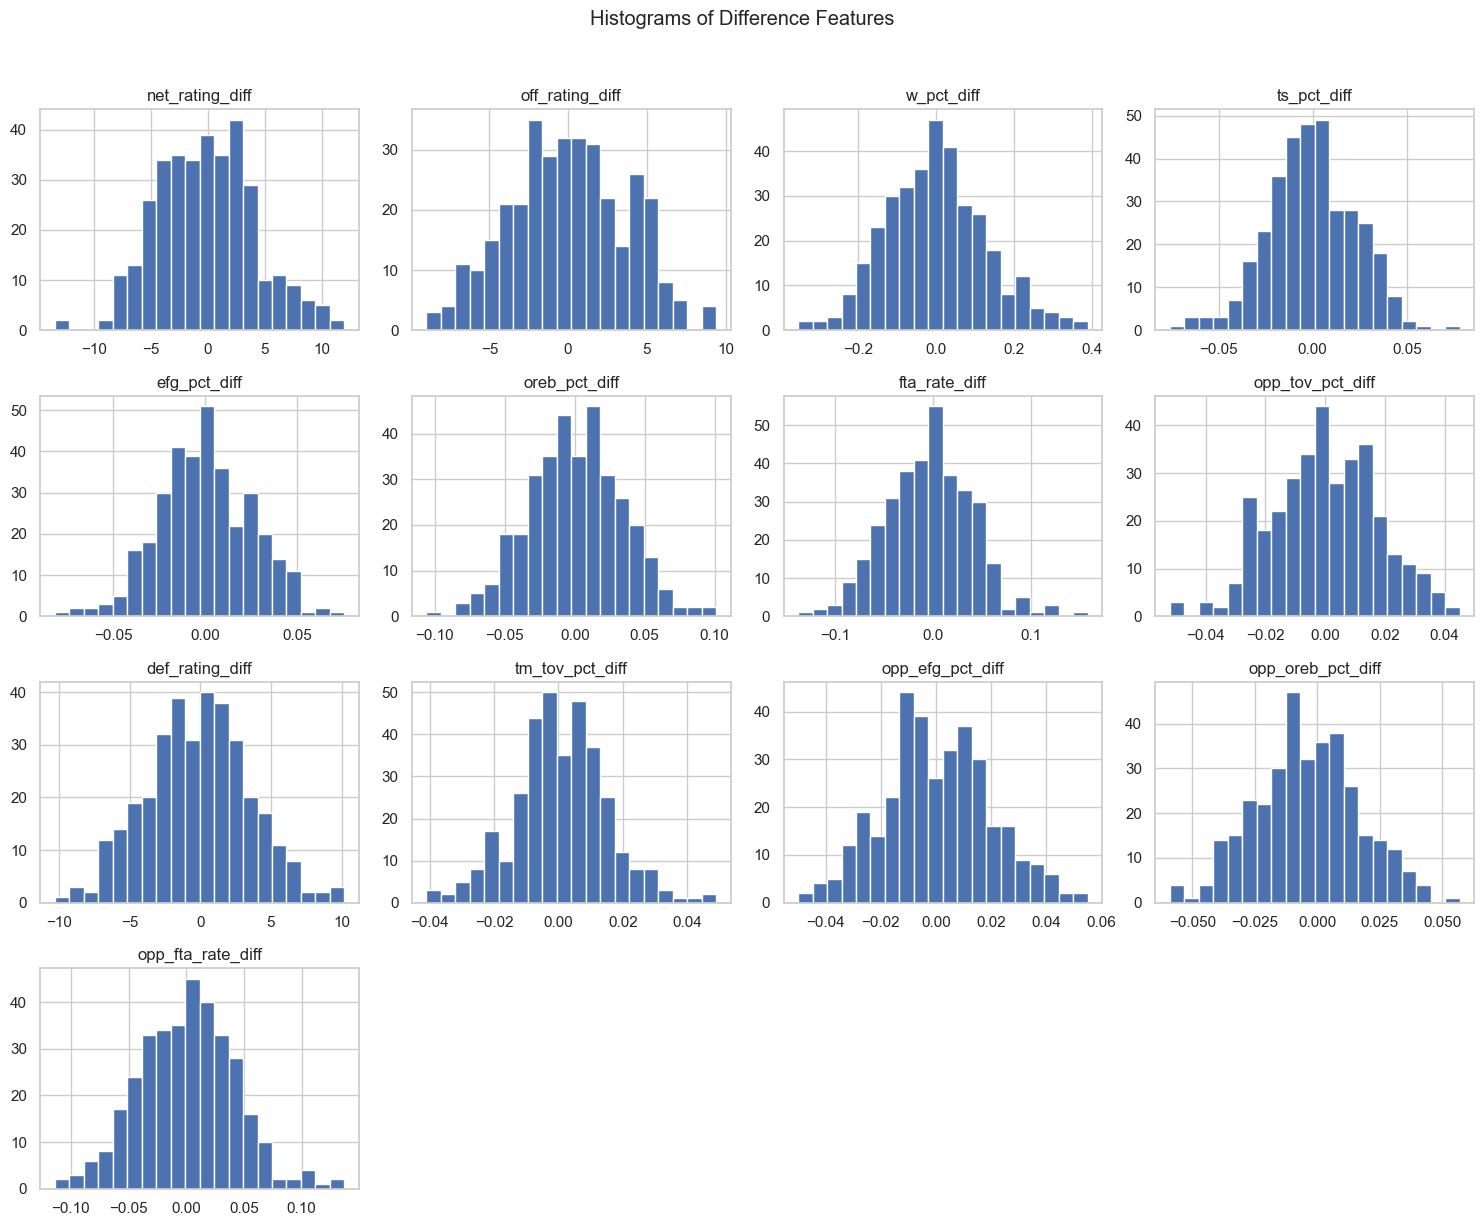

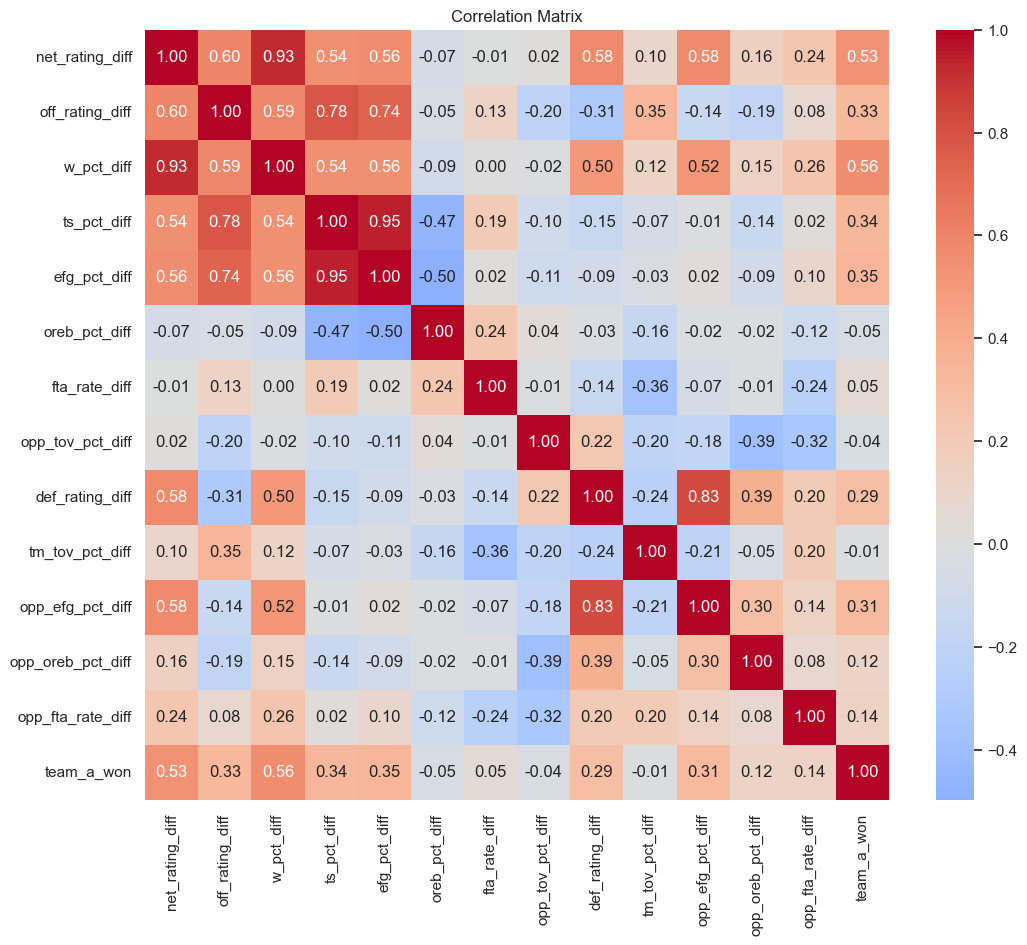

In [5]:
# Select numerical difference columns
diff_cols = [c for c in df.columns if 'diff' in c]

print("=== Basic Statistics ===")
display(df[diff_cols].describe().T[['mean', '50%', 'std', 'min', 'max']])

print("\n=== Target Variable Balance ===")
print(df['team_a_won'].value_counts(normalize=True))

# Histograms
df[diff_cols].hist(figsize=(15, 12), bins=20)
plt.suptitle('Histograms of Difference Features', y=1.02)
plt.tight_layout()
plt.show()

# Correlation MatrixS
plt.figure(figsize=(12, 10))
sns.heatmap(df[diff_cols + ['team_a_won']].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

### Top Predictors for the Logistic Regression Model

#### **Strongest Predictors**
These features show the highest correlation with winning and should drive most of the model’s signal:
- **w_pct_diff**  
- **net_rating_diff**  
- **off_rating_diff**  
- **ts_pct_diff**  
- **efg_pct_diff**  
- **opp_efg_pct_diff**

Overall, the model is likely to rely most on measures of team strength, shooting efficiency, and season win percentage differences.


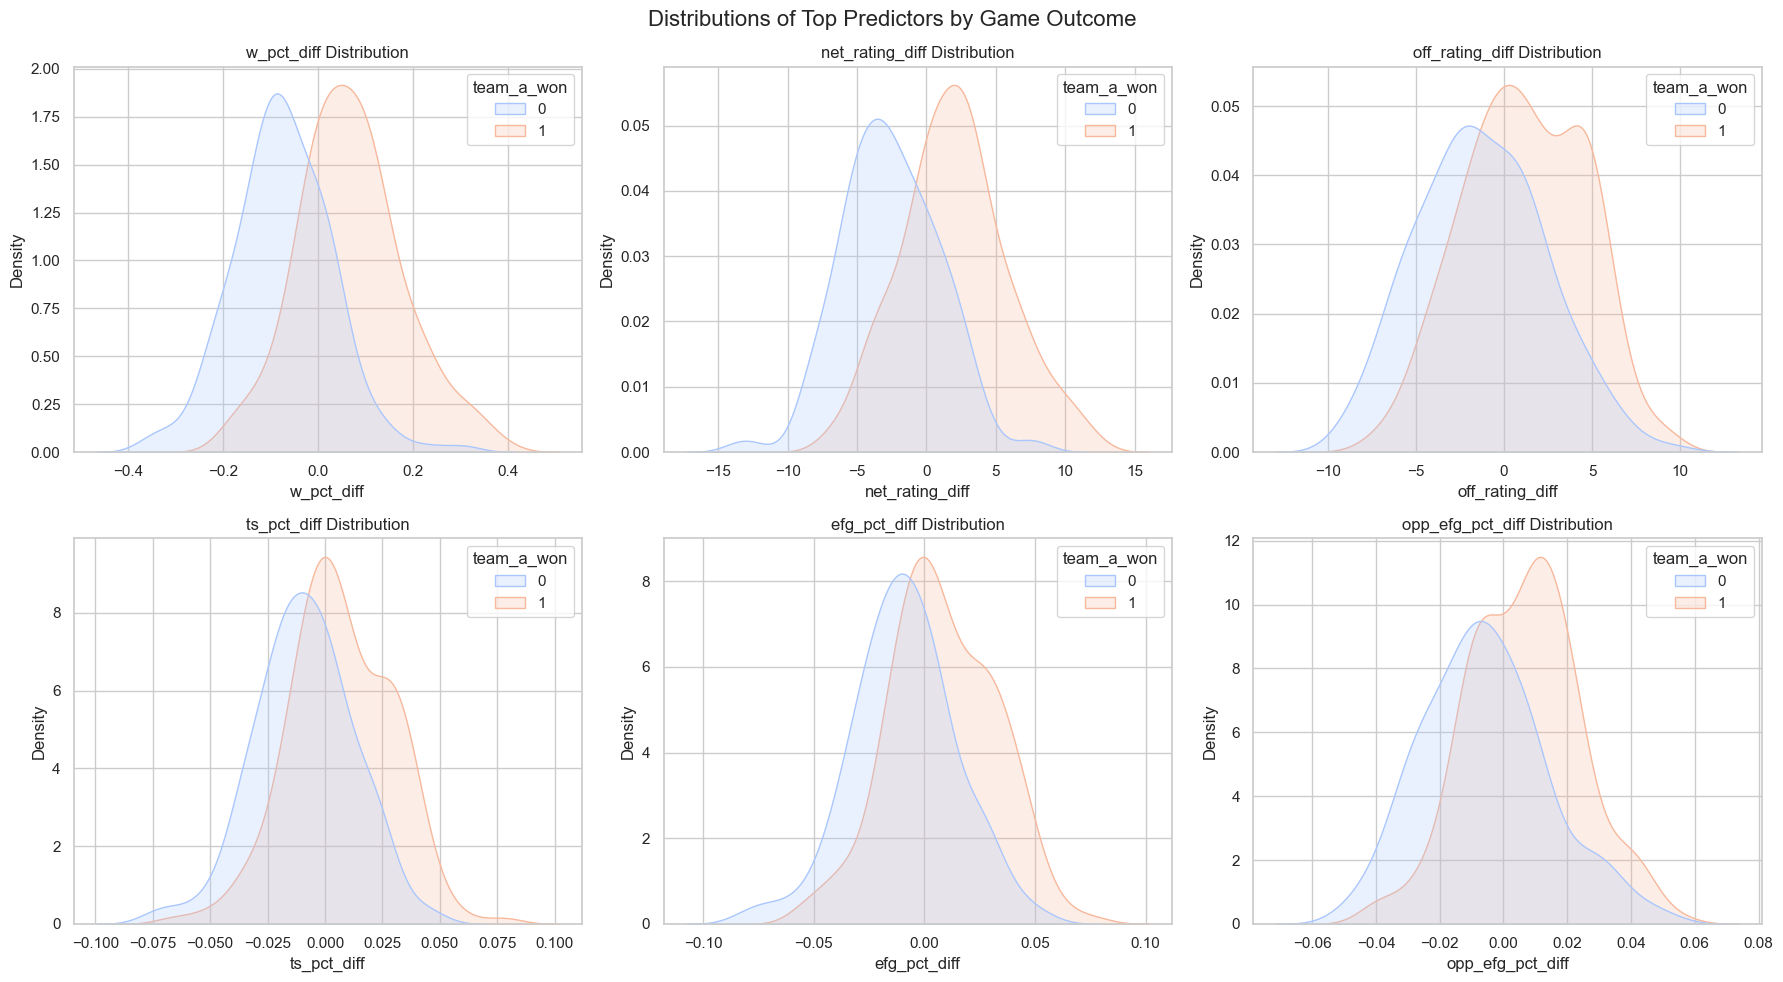

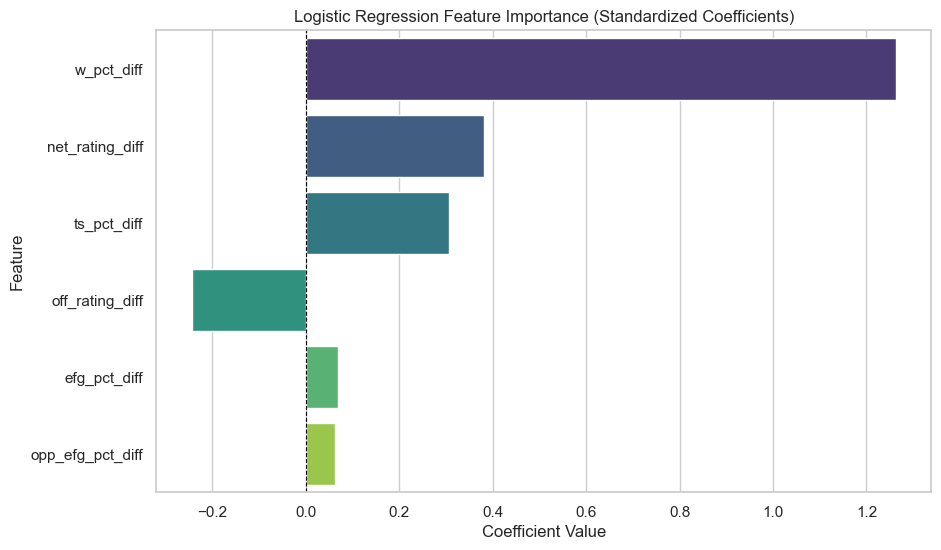

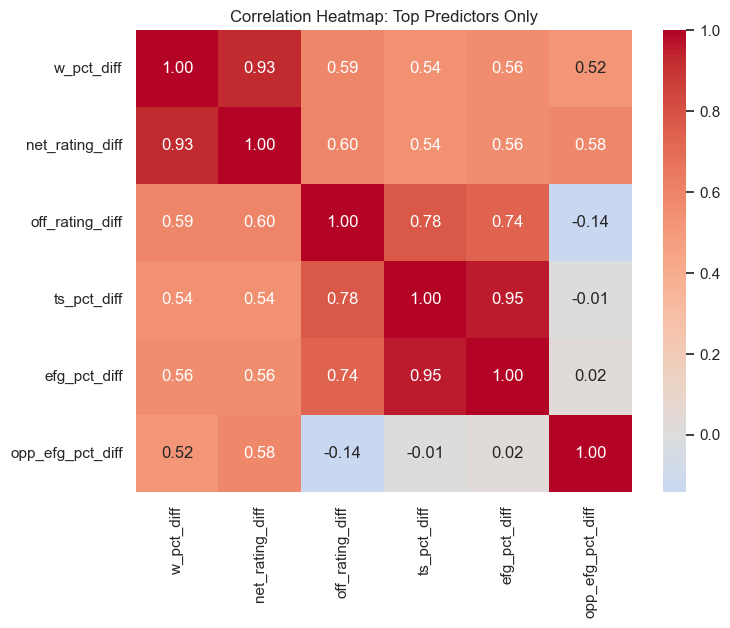

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

top_predictors = [
    'w_pct_diff', 
    'net_rating_diff', 
    'off_rating_diff', 
    'ts_pct_diff', 
    'efg_pct_diff', 
    'opp_efg_pct_diff'
]

# 1. Distribution Plots Split by Outcome
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distributions of Top Predictors by Game Outcome', fontsize=16)

for i, col in enumerate(top_predictors):
    row, col_idx = divmod(i, 3)
    sns.kdeplot(data=df, x=col, hue='team_a_won', fill=True, ax=axes[row, col_idx], palette='coolwarm')
    axes[row, col_idx].set_title(f'{col} Distribution')
    axes[row, col_idx].set_xlabel(col)

plt.tight_layout()
plt.show()

# 2. Coefficient Importance Plot from Logistic Regression
# Prepare data
X = df[top_predictors]
y = df['team_a_won']

# Standardize features so coefficients are comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit model
model = LogisticRegression()
model.fit(X_scaled, y)

# Plot coefficients
coef_df = pd.DataFrame({'Feature': top_predictors, 'Coefficient': model.coef_[0]})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', hue='Feature', palette='viridis', legend=False)
plt.title('Logistic Regression Feature Importance (Standardized Coefficients)')
plt.xlabel('Coefficient Value')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.show()

# 3. Reduced Correlation Heatmap (Top Predictors Only)
plt.figure(figsize=(8, 6))
sns.heatmap(df[top_predictors].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Top Predictors Only')
plt.show()